# Zeus setup

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

#import Zeus
import zeus21

#set up the CLASS cosmology
from classy import Class

#and the user parameters
UserParams = zeus21.User_Parameters(precisionboost=1.2)

## Cosmology setup

In [2]:
# cosmo inputs from table 2 last column of 1807.06209, as 21cmFAST
ombh2 = 0.02242 
omch2 = 0.11933
tau_re = 0.0544
hLittle = 0.6766
ns = 0.9665
As = np.exp(3.047)*10**(-10.)

In [3]:
#set up your input CLASS parameters here
#note; VCB feedback is turned on as the USE_RELATIVE_VELOCITIES flag in CosmoParams_input

CosmoParams_input = zeus21.Cosmo_Parameters_Input(
    omegac = omch2, omegab = ombh2, h_fid = hLittle, As = As, ns = ns, tau_fid = tau_re, 
    USE_RELATIVE_VELOCITIES = True, Flag_emulate_21cmfast=False
    )
CosmoParams_input_aniso = zeus21.Cosmo_Parameters_Input(
    omegac = omch2, omegab = ombh2, h_fid = hLittle, As = As, ns = ns, tau_fid = tau_re, 
    USE_RELATIVE_VELOCITIES = True, Flag_emulate_21cmfast=False,
    ANISO_XI_ETA = True
    )
ClassyCosmo = zeus21.runclass(CosmoParams_input)
ClassyCosmo_aniso = zeus21.runclass(CosmoParams_input_aniso)
print('CLASS has run, we store the cosmology.')

CLASS has run, we store the cosmology.


In [4]:
#define all cosmology (including derived) parameters, and save them to the CosmoParams structure
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CosmoParams_aniso = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input_aniso, ClassyCosmo_aniso)

#Generate and store the matter correlation function
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)
CorrFClass_aniso = zeus21.Correlations(UserParams, CosmoParams_aniso, ClassyCosmo_aniso)
print('Correlation functions saved.')

# Compute the HMF structure that stores associated quantities
HMFintclass = zeus21.HMF_interpolator(UserParams, CosmoParams, ClassyCosmo)
HMFintclass_aniso = zeus21.HMF_interpolator(UserParams, CosmoParams_aniso, ClassyCosmo_aniso)
print('HMF interpolator built. This ends the cosmology part -- moving to astrophysics.')

Correlation functions saved.
HMF interpolator built. This ends the cosmology part -- moving to astrophysics.


## Astrophysics setup

In [5]:
### POP II quantities first

################################
### Model Parameters
astromodel = 0            # ASTRO MODEL: 0 for GALUMI-like, 1 for 21cmfast-like, default 0
accretion_model = 0       # ACCRETION MODEL: 0 for exponential, 1 for EPS, default EXP

################################
### SFR(Mh) Parameteres
alphastar = 0.5          # alphastar powerlaw index for low masses, default 0.5
betastar = -0.5           # betastar powerlaw index for high masses, default -0.5
epsstar = 10**-1.             # epsilonstar = fstar at Mc
Mc = 3e11                 # Pivot mass at which the power law cuts for model 0, default Mc = 3e11
dlog10epsstardz = 0.0     # dlog10epsilonstar/dz, default 0

################################
### Escape fraction parameters
fesc10 = 0.1              # fesc(M) parameter. Power law normalized (fesc10) at M=1e10 Msun with index alphaesc
alphaesc = 0.0
L40_xray = 10**0.5        # L40_xray: soft-band (E<2 keV) lum/SFR in Xrays in units of 10^40 erg/s/(Msun/yr)
E0_xray = 500.            # E0_xray: minimum energy in eV
alpha_xray = -1.0         # Xray SED power-law index
Emax_xray_norm=2000       # max energy in eV to normalize SED. Keep at 2000 eV normally

################################
### LyA parameters
Nalpha_lyA_II = 9690      # number of Pop II photons between LyA and Ly Cont. per baryon (from BL05)
Nalpha_lyA_III = 17900    # number of Pop III photons between LyA and Ly Cont. per baryon value of 17900 is from Klessen & Glover 2023 (2303.12500), table A2

################################
### MTURN Parameters: 
Mturn_fixed = None        # Mturn_fixed: None if use Matom(z) at each z, Some value if fixed Mturn
FLAG_MTURN_SHARP= False   # Mturn_sharp: False if regular exponential cutoff, True if sharp cutoff, active only if Mturn_fixed is on

################################
### UVLF Parameters
C0dust = 4.43             # DUST PARAMETERS FOR UVLFs
C1dust = 1.99
sigmaUV = 0.5             # stochasticity (gaussian rms) in the halo-galaxy connection P(MUV | Mh) - TODO: only used in UVLF not sfrd

################################
ZMIN = 10.0               # down to which z we compute the evolution



################################
# Pop III Quantities
alphastar_III = 0 
betastar_III = 0
fstar_III = 10**(-3.0)
Mc_III = 1e7
dlog10epsstardz_III = 0.0

fesc7_III = 10**(-1.35)
alphaesc_III = -0.3
L40_xray_III = 10**0.5
alpha_xray_III = -1.0


USE_POPIII = True
USE_LW_FEEDBACK = True

A_LW = 2.0
beta_LW = 0.6

A_vcb = 1.0
beta_vcb = 1.8


#set up your astro parameters too, here the peak of f*(Mh) as an example

AstroParams = zeus21.Astro_Parameters(UserParams,
                                      CosmoParams, 
                                      astromodel = astromodel, 
                                      accretion_model = accretion_model,
                                      
                                      alphastar = alphastar, 
                                      betastar = betastar, 
                                      epsstar = epsstar, 
                                      Mc = Mc, 
                                      dlog10epsstardz = dlog10epsstardz,
                                      
                                      fesc10 = fesc10, 
                                      alphaesc = alphaesc,
                                      L40_xray = L40_xray, 
                                      E0_xray = E0_xray, 
                                      alpha_xray = alpha_xray, 
                                      Emax_xray_norm = Emax_xray_norm, 
                                      
                                      Nalpha_lyA_II = Nalpha_lyA_II, 
                                      Nalpha_lyA_III = Nalpha_lyA_III,
                                      
                                      Mturn_fixed = Mturn_fixed, 
                                      FLAG_MTURN_SHARP = FLAG_MTURN_SHARP,

                                      C0dust = C0dust, 
                                      C1dust = C1dust,
                                      sigmaUV = sigmaUV,
                                     
                                     
                                      USE_POPIII = USE_POPIII, 
                                      USE_LW_FEEDBACK = USE_LW_FEEDBACK,

                                      alphastar_III = alphastar_III, 
                                      betastar_III = betastar_III,
                                      fstar_III = fstar_III,
                                      Mc_III = Mc_III,
                                      dlog10epsstardz_III = dlog10epsstardz_III,

                                      fesc7_III = fesc7_III,
                                      alphaesc_III = alphaesc_III,
                                      L40_xray_III = L40_xray_III,
                                      alpha_xray_III = alpha_xray_III,
                                               
                                      A_LW = A_LW,
                                      beta_LW = beta_LW,
                                      
                                      A_vcb = A_vcb,
                                      beta_vcb = beta_vcb
                                               )

CoeffStructure = zeus21.get_T21_coefficients(UserParams, CosmoParams, ClassyCosmo, AstroParams, HMFintclass, zmin=ZMIN)
CoeffStructure_aniso = zeus21.get_T21_coefficients(UserParams, CosmoParams_aniso, ClassyCosmo_aniso, AstroParams, HMFintclass_aniso,
                                                    zmin=ZMIN)
zlist = CoeffStructure.zintegral
zlist_aniso = CoeffStructure_aniso.zintegral
print('SFRD and coefficients stored. Move ahead.')

SFRD and coefficients stored. Move ahead.


# Fluctuations with Pop III contributions (influenced by $\xi_v$ anisotropy)

In [6]:
RSDMODE = 1

PS21 = zeus21.Power_Spectra(UserParams, CosmoParams, AstroParams, ClassyCosmo, CorrFClass, CoeffStructure, RSD_MODE = RSDMODE)
PS21_aniso = zeus21.Power_Spectra(UserParams, CosmoParams_aniso, AstroParams, ClassyCosmo_aniso, CorrFClass_aniso, CoeffStructure_aniso,
                                   RSD_MODE = RSDMODE)

klist = CorrFClass._klistCF
klist_aniso = CorrFClass_aniso._klistCF

### 21-cm power spectrum

In [7]:
from scipy.interpolate import RegularGridInterpolator

Deltasq_T21_interp = RegularGridInterpolator((zlist, klist), PS21.Deltasq_T21,
                                              method = 'cubic', bounds_error=False, fill_value=0)
Deltasq_T21_interp_aniso = RegularGridInterpolator((zlist_aniso, klist_aniso), PS21_aniso.Deltasq_T21,
                                                  method = 'cubic', bounds_error=False, fill_value=0)

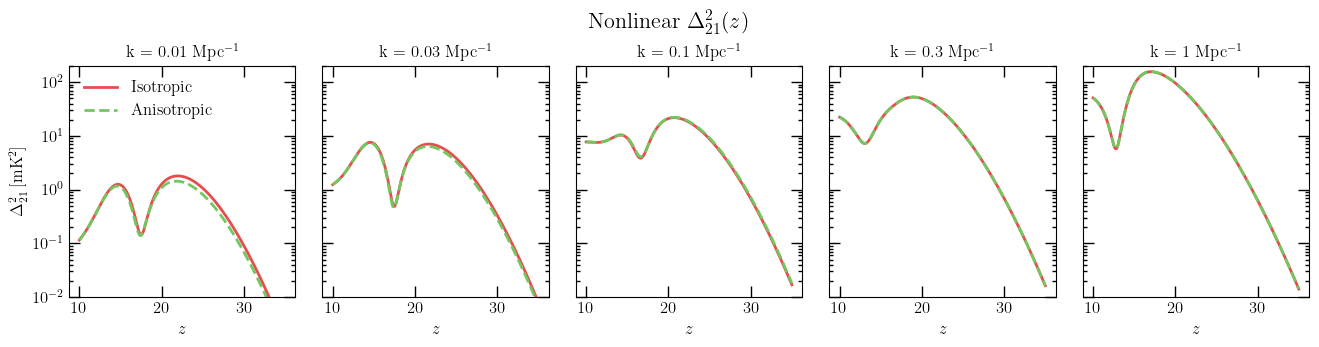

In [8]:
k_values = [0.01, 0.03, 0.1, 0.3, 1]
zlistHighRes = np.geomspace(zlist[0], zlist[-1], 1000)

fig, axes = plt.subplots(1, len(k_values), figsize=(16, 3.3), sharey=True)

for i, kchoose in enumerate(k_values):
    powerSpectrum = Deltasq_T21_interp((zlistHighRes, kchoose))
    powerSpectrum_aniso = Deltasq_T21_interp_aniso((zlistHighRes, kchoose))

    ax = axes[i]
    ax.semilogy(zlistHighRes, powerSpectrum, color="#E64D4E", linewidth=2, label='Isotropic')
    ax.semilogy(zlistHighRes, powerSpectrum_aniso, color="#72C75F", linewidth=2, linestyle='--', label='Anisotropic')

    # ax.set_xlim([10, 35])
    ax.set_ylim([0.01, 200])
    ax.set_title(f"k = {kchoose:g} Mpc$^{{-1}}$", fontsize=12)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$z$', fontsize=12)

axes[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=12)
axes[0].legend(fontsize=12, frameon=False, loc='upper left')
fig.subplots_adjust(wspace=0.12, top=0.81)
fig.suptitle(r'Nonlinear $\Delta^2_{21}(z)$', fontsize=16)
plt.show()

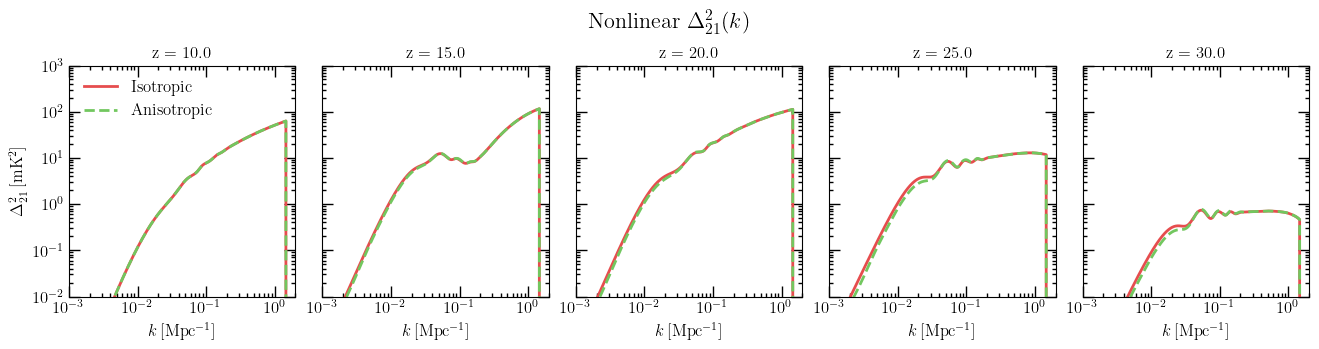

In [9]:
z_values = [10, 15, 20, 25, 30]
klistHighRes = np.geomspace(1e-4, 1e1, 1000)

fig, axes = plt.subplots(1, len(z_values), figsize=(16, 3.3), sharex=True, sharey=True)

for i, zchoose in enumerate(z_values):
    powerSpectrum = Deltasq_T21_interp((zchoose, klistHighRes))
    powerSpectrum_aniso = Deltasq_T21_interp_aniso((zchoose, klistHighRes))

    ax = axes[i]
    ax.loglog(klistHighRes, powerSpectrum, color="#E64D4E", linewidth=2, label='Isotropic')
    ax.loglog(klistHighRes, powerSpectrum_aniso, color="#72C75F", linewidth=2, linestyle='--', label='Anisotropic')

    ax.set_xlim([1e-3, 2])
    ax.set_ylim([1e-2, 1e3])
    ax.set_title(f"z = {zchoose:.1f}", fontsize=12)
    ax.tick_params(which='major', length=8, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='minor', length=3, width=1, direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlabel(r'$k\,\rm [Mpc^{-1}]$', fontsize=12)

axes[0].set_ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$', fontsize=12)
axes[0].legend(fontsize=12, frameon=False, loc='upper left')
fig.subplots_adjust(wspace=0.12, top=0.81)
fig.suptitle(r'Nonlinear $\Delta^2_{21}(k)$', fontsize=16)
plt.show()